## Assignment 6
• Implement the model with NN influence group.


• Simulate the model with N = 100 agents, q = 3 and 4, and the
independence factor p ranging from 0.0 to 0.5 with step 0.02. Use
the following networks as the underlying topology of social interactions: complete graph, BA(100, 4), WS(100, 4, 0.01), WS(100, 4,
0.2). Finish the simulations after 1000 Monte Carlo steps.


• For each parameter set calculate the magnetization in the system as
a function of time, averaged over 100 independent runs.


• Plot the time evolution of the magnetization for the WS(100,4,0.01)
network (both averaged and from single run).


• Plot the average final magnetization as a function of independence
factor p for
– q = 3 and different network topologies (one plot),
– q = 4 and different network topologies (one plot),
– WS(100, 4, 0.01) network and different values of q (one plot).

In [26]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np
plt.rcParams['figure.figsize'] = [15, 8]

In [27]:
def q_voter_cg(MCS, N, p, q):
    G = nx.complete_graph(N)
    opinions = [1] * N  # all initial opinions to +1
    opinions_in_time = [opinions.count(1)]
    
    for _ in range(MCS):  # Monte Carlo steps
        opinion_1_count = 0
        for spinson in range(N):
            a = random.random()
            if a < p:  # independently
                b = random.random()
                if b >= 0.5:  # flip to opposite
                    opinions[spinson] = -opinions[spinson]
            elif a >= p:  # conformity
                neighbors = list(G.neighbors(spinson))
                kk = len(neighbors)
                qq = min(kk, q)
                q_panel = random.choices(neighbors, k=qq)  # without repetition
                opinions_panel = {opinions[k] for k in q_panel}  
                if len(opinions_panel) == 1:  # all neighbors have the same opinion
                    opinions[spinson] = opinions_panel.pop()
            if opinions[spinson] == 1:
                opinion_1_count += 1
        opinions_in_time.append(opinion_1_count)
    return opinions_in_time[:-1]

In [28]:
def q_voter_ba(MCS, N, M, p, q):
    G = nx.barabasi_albert_graph(N, M)
    opinions = [1] * N  # all initial opinions to +1
    opinions_in_time = [opinions.count(1)]
    
    for _ in range(MCS):  # Monte Carlo steps
        opinion_1_count = 0
        for spinson in range(N):
            a = random.random()
            if a < p:  # independently
                b = random.random()
                if b >= 0.5:  # flip to opposite
                    opinions[spinson] = -opinions[spinson]
            elif a >= p:  # conformity
                neighbors = list(G.neighbors(spinson))
                kk = len(neighbors)
                qq = min(kk, q)
                q_panel = random.choices(neighbors, k=qq)  # without repetition
                opinions_panel = {opinions[k] for k in q_panel}
                if len(opinions_panel) == 1:  # all neighbors have the same opinion
                    opinions[spinson] = opinions_panel.pop()
            if opinions[spinson] == 1:
                opinion_1_count += 1
        opinions_in_time.append(opinion_1_count)
    return opinions_in_time[:-1]

In [29]:
def q_voter_ws(MCS, N, kkk, beta, p, q):
    G = nx.watts_strogatz_graph(N, kkk, beta)
    opinions = [1] * N  # all initial opinions to +1
    opinions_in_time = [opinions.count(1)]
    
    for _ in range(MCS):  # Monte Carlo steps
        opinion_1_count = 0
        for spinson in range(N):
            a = random.random()
            if a < p:  # independently
                b = random.random()
                if b >= 0.5:  # flip to opposite
                    opinions[spinson] = -opinions[spinson]
            else:  # conformity
                neighbors = list(G.neighbors(spinson))
                kk = len(neighbors)
                qq = min(kk, q)
                q_panel = random.choices(neighbors, k=qq)  # without repetition
                opinions_panel = {opinions[k] for k in q_panel}
                if len(opinions_panel) == 1:  # all neighbors have the same opinion
                    opinions[spinson] = opinions_panel.pop()
            if opinions[spinson] == 1:
                opinion_1_count += 1
        opinions_in_time.append(opinion_1_count)
    return opinions_in_time[:-1]

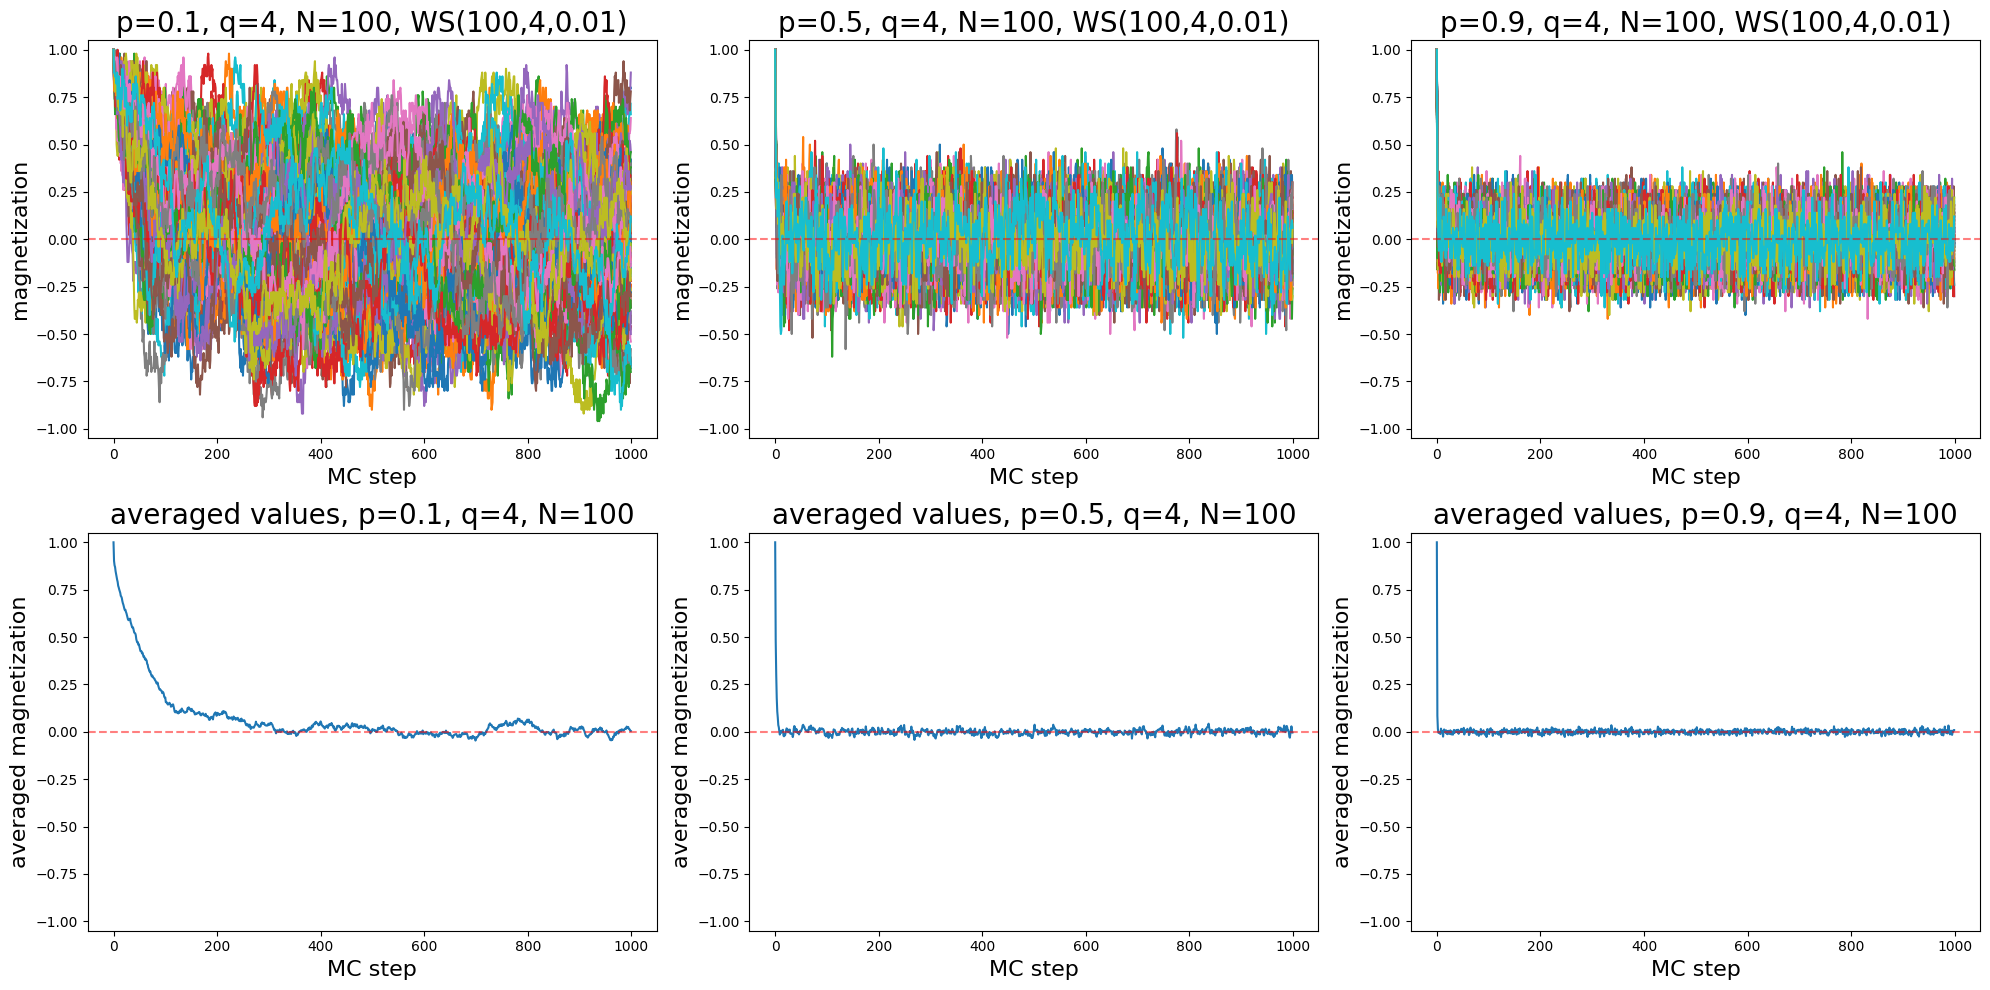

In [30]:
N=100
q=4
p_values=[0.1,0.5,0.9]
MCS = 1000
num_of_traj = 100
t = np.linspace(0,MCS-1,MCS)
k = 4
beta = 0.01
data = [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]
fig, axes = plt.subplots(2, 3,figsize=(20,10))
for j in range(len(p_values)):
    p = p_values[j]
    x, y = data[j]
    ws_final_magn_list = []
    av_ws_final_magn_list = []
    for n in range(num_of_traj):
        q_vot = q_voter_ws(MCS,N,k,beta,p,q)
        ws_final_mag = [(k-(N-k))/N for k in q_vot]
        av_ws_final_magn_list.append(ws_final_mag)
        axes[x,y].plot(t,ws_final_mag)
    axes[x,y].set_title(f"p={p}, q={q}, N={N}, WS({N},{k},{beta})",fontsize=20)
    axes[x,y].set_xlabel("MC step",fontsize=16)
    axes[x,y].set_ylabel("magnetization",fontsize=16)
    axes[x,y].set_ylim(-1.05, 1.05)
    axes[x,y].axhline(y=0, color='red', linestyle='--',alpha=0.5)
    x, y = data[j+3]
    axes[x,y].plot(t,np.mean(av_ws_final_magn_list, axis=0))
    axes[x,y].set_title(f"averaged values, p={p}, q={q}, N={N}",fontsize=20)
    axes[x,y].set_xlabel("MC step",fontsize=16)
    axes[x,y].set_ylabel("averaged magnetization",fontsize=16)
    axes[x,y].set_ylim(-1.05, 1.05)
    axes[x,y].axhline(y=0, color='red', linestyle='--',alpha=0.5)
plt.tight_layout()    
plt.show()

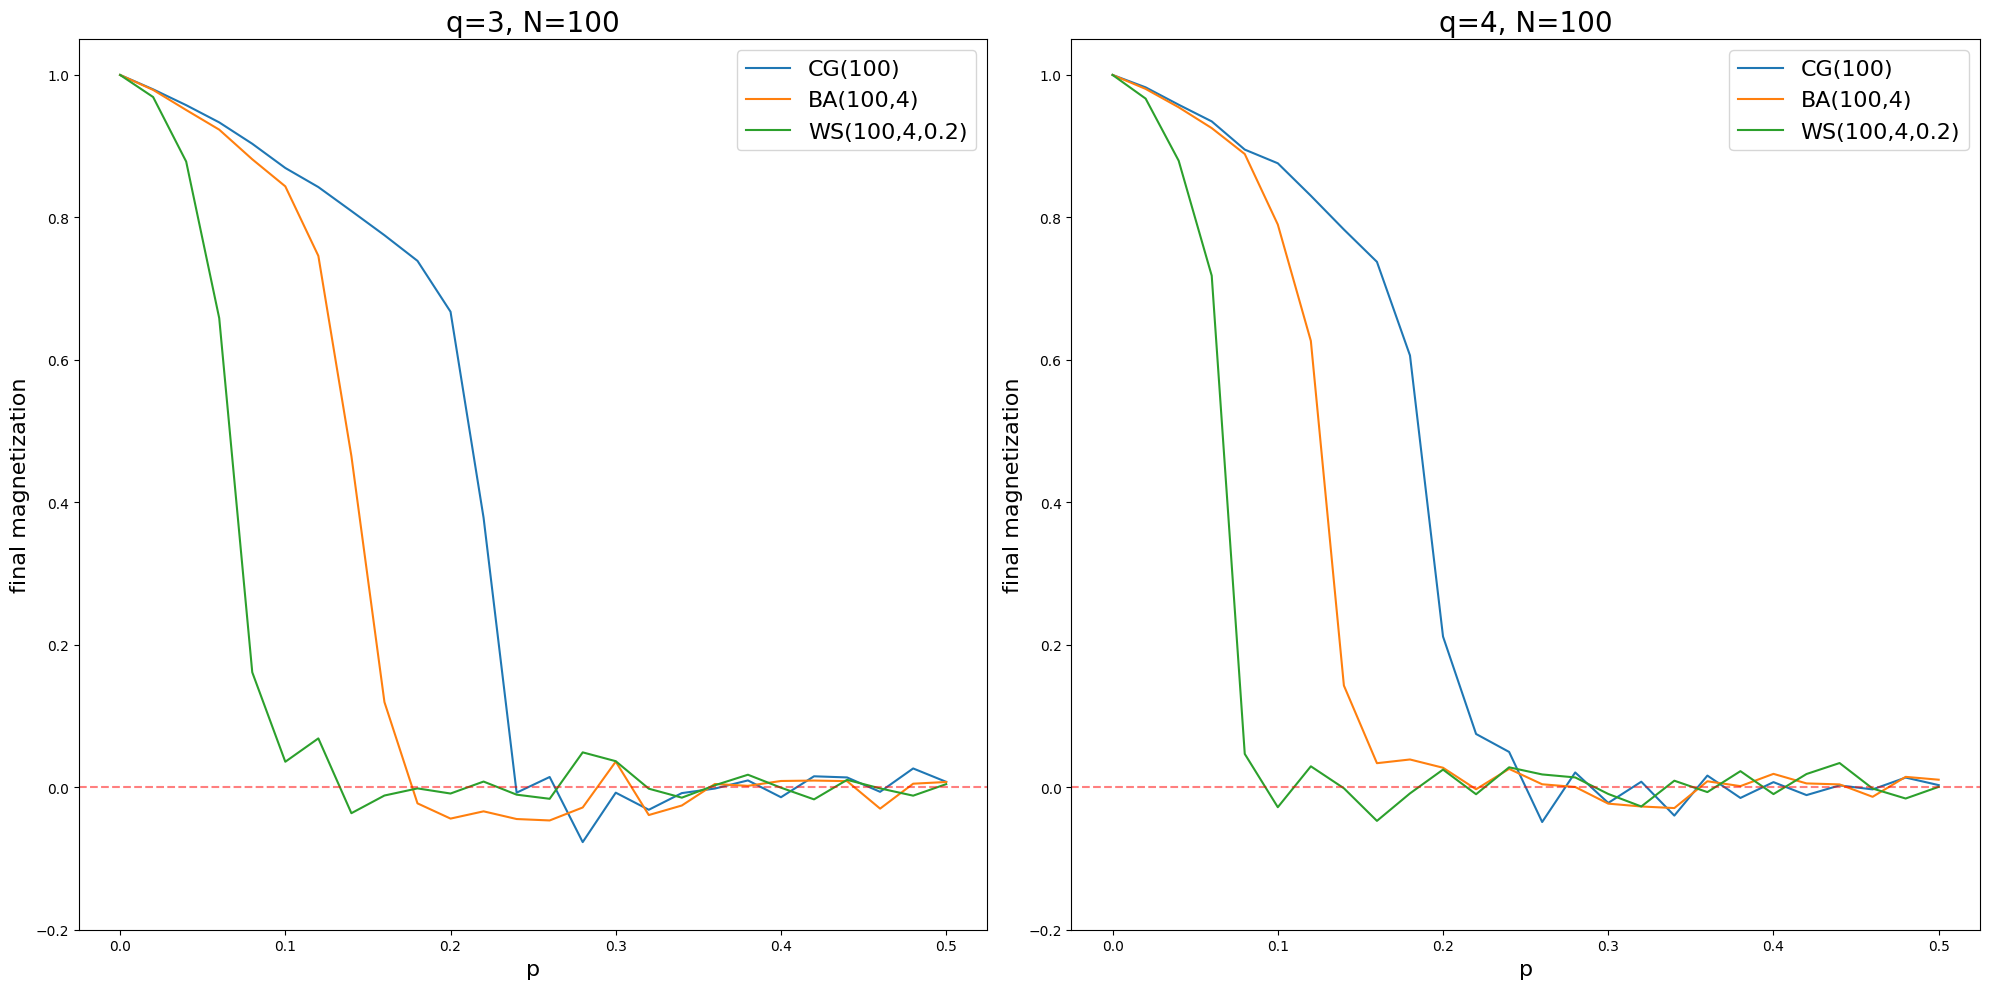

In [31]:
N=100
MCS = 1000
num_of_traj = 100
q_values=[3,4]
p_values=np.arange(0,0.52,step=0.02)
fig, axes = plt.subplots(1, 2,figsize=(20,10))
for j in range(len(q_values)):
    q = q_values[j]
    cg_final_magn_list = []
    ba_final_magn_list = []
    ws_final_magn_list = []
    for p in p_values:
        cg_magn_list = []
        ba_magn_list = []
        ws_magn_list = []
        for n in range(num_of_traj):
            q_vot = q_voter_cg(MCS,N,p,q)
            cg_final_mag = (q_vot[-1]-(N-q_vot[-1]))/N
            q_vot = q_voter_ba(MCS,N,4,p,q)
            ba_final_mag = (q_vot[-1]-(N-q_vot[-1]))/N
            q_vot = q_voter_ws(MCS,N,4,0.2,p,q)
            ws_final_mag = (q_vot[-1]-(N-q_vot[-1]))/N
            cg_magn_list.append(cg_final_mag)
            ba_magn_list.append(ba_final_mag)
            ws_magn_list.append(ws_final_mag)
        cg_final_magn_list.append(np.mean(cg_magn_list))
        ba_final_magn_list.append(np.mean(ba_magn_list))
        ws_final_magn_list.append(np.mean(ws_magn_list))
    axes[j].plot(p_values,cg_final_magn_list,label=f"CG({N})")
    axes[j].plot(p_values,ba_final_magn_list,label=f"BA({N},4)")
    axes[j].plot(p_values,ws_final_magn_list,label=f"WS({N},4,0.2)")
    axes[j].set_title(f"q={q}, N={N}",fontsize=20)
    axes[j].set_xlabel("p",fontsize=16)
    axes[j].set_ylabel("final magnetization",fontsize=16)
    axes[j].set_ylim(-0.2, 1.05)
    axes[j].legend(fontsize=16)
    axes[j].axhline(y=0, color='red', linestyle='--',alpha=0.5)
plt.tight_layout()    
plt.show()

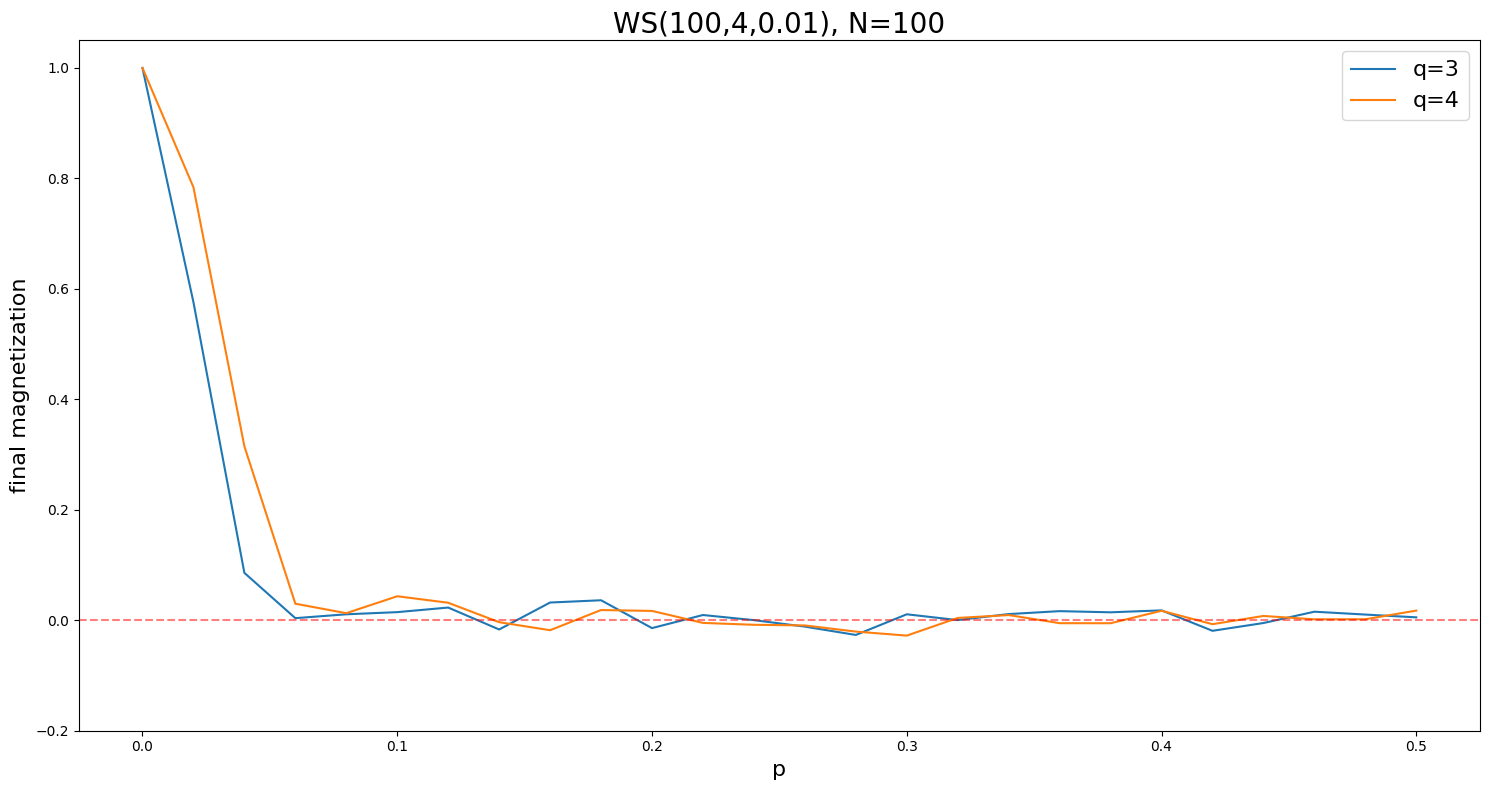

In [32]:
N=100
MCS = 1000
num_of_traj = 200
q_values=[3,4]
p_values=np.arange(0,0.52,step=0.02)
for j in range(len(q_values)):
    q = q_values[j]
    ws_final_magn_list = []
    for p in p_values:
        ws_magn_list = []
        for n in range(num_of_traj):
            q_vot = q_voter_ws(MCS,N,4,0.01,p,q)
            ws_final_mag = (q_vot[-1]-(N-q_vot[-1]))/N
            ws_magn_list.append(ws_final_mag)
        ws_final_magn_list.append(np.mean(ws_magn_list))
    plt.plot(p_values,ws_final_magn_list,label=f"q={q}")
plt.axhline(y=0, color='red', linestyle='--',alpha=0.5)
plt.title(f"WS({N},4,0.01), N={N}",fontsize=20)
plt.xlabel("p",fontsize=16)
plt.ylabel("final magnetization",fontsize=16)
plt.ylim(-0.2, 1.05)
plt.legend(fontsize=16)
plt.tight_layout()    
plt.show()